In [1]:
import pandas as pd # Library to load and manipulate data and for One-Hot Encoding
import numpy as np # Library to calculate the mean and standard deviation
from sklearn import preprocessing # Library for data preprocessing
from sklearn.model_selection import train_test_split # Module for splitting data into training and testing sets
from sklearn.tree import DecisionTreeClassifier # Module for a classification tree
from sklearn.tree import plot_tree # Module to plot decision tree
from sklearn.metrics import accuracy_score, confusion_matrix # Modules for evaluating the model
import graphviz # Library for rendering DOT format data

In [2]:
# load dataset
df = pd.read_csv('data/raw/REKOD_RAWATAN_PRIMER_SEKUNDER_KelasDiagnosis.csv')
df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Not Balanced diet,First degree relative with diabetes,genetic predisposition,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,NaN,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,NaN,0.0,0,0.0,0.0,0.0,0.0,2


In [3]:
# Count the remaining data points
data_count = df.shape[0]

print("Dataset size:")
print(data_count)

Dataset size:
5000


In [4]:
# Treat missing values / Data cleaning
# Group by 'Diagnosis' and count missing values in each column
missing_values_by_diagnosis = df.groupby('Diagnosis').apply(lambda x: x.isnull().sum())

print("Missing values by diagnosis:")
print(missing_values_by_diagnosis)

Missing values by diagnosis:
           RecordNumber  Age  Gender  BMI  Asymptomatic  Increased thirst  \
Diagnosis                                                                   
1                     0    0       0    0             0                 0   
2                     0    0       0    0             0                 0   
3                     0    0       0    0             0                 0   
4                     0    0       0    0          1440              1440   
5                     0    0       0    0           944               944   

           Polydipsia  Polyuria  lethargy  Weight loss  ...  \
Diagnosis                                               ...   
1                   0         0         0            0  ...   
2                   0         0         0            0  ...   
3                   0         0         0            0  ...   
4                1440      1440      1440         1440  ...   
5                 944       944       944          94

In [5]:
# Check for null values
null_attributes = df.isnull().sum()

# List the attributes with null values
null_attributes_list = null_attributes[null_attributes > 0].index.tolist()

print("List of null attributes:")
print(null_attributes_list)

List of null attributes:
['Asymptomatic', 'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss', 'Blurring of Vision', 'Recurrent infection', 'poor glycaemic control', 'Obesity', 'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'Microalbuminuria', 'Overtprotein', 'CVD', 'IGT or IFG on previous testing', 'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ', 'Women with PCOS', 'Tempoh_Menghidap_Diabetes', 'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement', 'on erythropoietin injections', 'Physical inactivity', 'Not Balanced diet', 'First degree relative with diabetes', 'genetic predisposition', 'Dyslipidaemia', 'Pancreatic damage or surgery', 'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD']


In [6]:
# drop unused data
unused_columns = ['poor glycaemic control', 'Microalbuminuria', 'Overtprotein',
                   'Tempoh_Menghidap_Diabetes', 'genetic predisposition']
new_df = df.drop(unused_columns, axis=1)

      RecordNumber  Age  Gender  BMI  Asymptomatic  Increased thirst  \
0                1   30       0   26           1.0               0.0   
1                2   39       0   36           1.0               0.0   
2               20   38       1   40           0.0               1.0   
3               22   37       1   22           0.0               0.0   
4               23   44       0   34           0.0               0.0   
...            ...  ...     ...  ...           ...               ...   
4995          4996   64       0   34           NaN               NaN   
4996          4997   53       0   21           NaN               NaN   
4997          4998   49       0   28           NaN               NaN   
4998          4999   62       1   24           NaN               NaN   
4999          5000   65       1   33           NaN               NaN   

      Polydipsia  Polyuria  lethargy  Weight loss  ...  Smokers   \
0            0.0       0.0       0.0          0.0  ...         1   

In [7]:
# Drop rows with 'Diagnosis' equal to 5
new_df = new_df[new_df['Diagnosis'] != 5]

# Count the remaining data points
data_count = new_df.shape[0]

print("Count of data points after dropping diagnosis 'five':")
print(data_count)

Count of data points after dropping diagnosis 'five':
4056


In [8]:
new_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [9]:
new_df.columns

Index(['RecordNumber', 'Age', 'Gender', 'BMI', 'Asymptomatic',
       'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss',
       'Blurring of Vision', 'Recurrent infection', 'Obesity',
       'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD',
       'IGT or IFG on previous testing',
       'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ',
       'Women with PCOS',
       'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement',
       'on erythropoietin injections', 'Physical inactivity', 'Smokers ',
       'Not Balanced diet', 'First degree relative with diabetes',
       'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery',
       'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD',
       'Diagnosis'],
      dtype='object')

In [10]:
unique_values = {}
for column in ['RecordNumber', 'Age', 'Gender', 'BMI', 'Asymptomatic', 'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss', 'Blurring of Vision', 'Recurrent infection', 'Obesity', 'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD', 'IGT or IFG on previous testing', 'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ', 'Women with PCOS', 'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement', 'on erythropoietin injections', 'Physical inactivity', 'Smokers ', 'Not Balanced diet', 'First degree relative with diabetes', 'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery', 'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD', 'Diagnosis']:
    unique_values[column] = new_df[column].unique()

for key, value in unique_values.items():
    print(f" {key}: {value}")


 RecordNumber: [   1    2   20 ... 4998 4999 5000]
 Age: [30 39 38 37 44 49 43 34 50 61 66 53 64 21 51 55 60 54 33 41 42 36 32 35
 45 47 52 62 57 58 56 59 82 83 76 20 27 25 28 22 19 46 48 26 40 31 24 29
 18 23 68 63 69 67 65 70]
 Gender: [0 1]
 BMI: [26 36 40 22 34 32 43 19 38 41 27 24 45 23 21 33 37 25 30 18 29 42 35 28
 44 20 39 31]
 Asymptomatic: [ 1.  0. nan]
 Increased thirst: [ 0.  1. nan]
 Polydipsia: [ 0.  1. nan]
 Polyuria: [ 0.  1. nan]
 lethargy: [ 0.  1. nan]
 Weight loss: [ 0.  1. nan]
 Blurring of Vision: [ 1.  0. nan]
 Recurrent infection: [ 0.  1. nan]
 Obesity: [ 3.  0.  4.  2.  1. nan]
 Acanthosis Nigricans: [ 1.  0. nan]
 A1c: [ 0.  2.  3.  1. nan]
 FPG: [ 2.  0.  3. nan]
 RPG: [ 0.  2.  3. nan]
 OGTT: [ 0.  4.  2.  3. nan]
 HDL: [ 1.  0. nan]
 TG: [ 0.  1. nan]
 CVD: [ 0.  1. nan]
 IGT or IFG on previous testing: [ 0.  1. nan]
 Women who delivered a baby weighing >= 4kg : [ 0.  1. nan]
 Women with GDM : [ 0.  1. nan]
 Women with PCOS: [ 0.  1. nan]
 receiving antire

In [11]:
diagnoses = [1, 2, 3,4]

for diagnosis in diagnoses:
    print(f"Diagnosis {diagnosis}:")
    for col in ['A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'Anaemia', 'CVD', 'CKD']:
        unique_vals = new_df[new_df['Diagnosis'] == diagnosis][col].unique()
        print(f"{col}: {unique_vals}")


Diagnosis 1:
A1c: [0. 1.]
FPG: [0.]
RPG: [0.]
OGTT: [0.]
HDL: [0. 1.]
TG: [0. 1.]
Anaemia: [0.]
CVD: [0.]
CKD: [0.]
Diagnosis 2:
A1c: [0. 2.]
FPG: [2. 0.]
RPG: [0. 2.]
OGTT: [0.]
HDL: [1. 0.]
TG: [0. 1.]
Anaemia: [0. 1.]
CVD: [0. 1.]
CKD: [1. 0.]
Diagnosis 3:
A1c: [3. 0.]
FPG: [3. 0.]
RPG: [0. 3.]
OGTT: [4. 2. 3.]
HDL: [0. 1.]
TG: [1. 0.]
Anaemia: [1. 0.]
CVD: [1. 0.]
CKD: [0. 1.]
Diagnosis 4:
A1c: [nan]
FPG: [nan]
RPG: [nan]
OGTT: [nan]
HDL: [nan]
TG: [nan]
Anaemia: [nan]
CVD: [nan]
CKD: [nan]


In [12]:
# Assuming 'df' is your DataFrame
# Replace the value 2 with 1 for Diagnosis 2
new_df.loc[new_df['Diagnosis'] == 2, 'A1c'] = new_df.loc[df['Diagnosis'] == 2, 'A1c'].replace(2, 1)
new_df.loc[new_df['Diagnosis'] == 2, 'FPG'] = new_df.loc[df['Diagnosis'] == 2, 'FPG'].replace(2, 1)
new_df.loc[new_df['Diagnosis'] == 2, 'RPG'] = new_df.loc[df['Diagnosis'] == 2, 'RPG'].replace(2, 1)

# Replace the value 2 with 1 for Diagnosis 2
new_df.loc[new_df['Diagnosis'] == 3, 'A1c'] = new_df.loc[df['Diagnosis'] == 3, 'A1c'].replace(3, 2)
new_df.loc[new_df['Diagnosis'] == 3, 'FPG'] = new_df.loc[df['Diagnosis'] == 3, 'FPG'].replace(3, 2)
new_df.loc[new_df['Diagnosis'] == 3, 'RPG'] = new_df.loc[df['Diagnosis'] == 3, 'RPG'].replace(3, 2)




In [13]:
diagnoses = [1, 2, 3,4]

for diagnosis in diagnoses:
    print(f"Diagnosis {diagnosis}:")
    for col in ['A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'Anaemia', 'CVD', 'CKD']:
        unique_vals = new_df[new_df['Diagnosis'] == diagnosis][col].unique()
        print(f"{col}: {unique_vals}")

Diagnosis 1:
A1c: [0. 1.]
FPG: [0.]
RPG: [0.]
OGTT: [0.]
HDL: [0. 1.]
TG: [0. 1.]
Anaemia: [0.]
CVD: [0.]
CKD: [0.]
Diagnosis 2:
A1c: [0. 1.]
FPG: [1. 0.]
RPG: [0. 1.]
OGTT: [0.]
HDL: [1. 0.]
TG: [0. 1.]
Anaemia: [0. 1.]
CVD: [0. 1.]
CKD: [1. 0.]
Diagnosis 3:
A1c: [2. 0.]
FPG: [2. 0.]
RPG: [0. 2.]
OGTT: [4. 2. 3.]
HDL: [0. 1.]
TG: [1. 0.]
Anaemia: [1. 0.]
CVD: [1. 0.]
CKD: [0. 1.]
Diagnosis 4:
A1c: [nan]
FPG: [nan]
RPG: [nan]
OGTT: [nan]
HDL: [nan]
TG: [nan]
Anaemia: [nan]
CVD: [nan]
CKD: [nan]


In [14]:
new_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [15]:
# Save the filter data to a new CSV file
new_df.to_csv('DIAGNOSIS_RECORDv1.csv', index=False)

In [16]:
# Open new filter dataset
df = pd.read_csv('DIAGNOSIS_RECORDv1.csv')

In [17]:
df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [18]:
# Check if any missing values 
print(df.isnull().sum())

RecordNumber                                                                               0
Age                                                                                        0
Gender                                                                                     0
BMI                                                                                        0
Asymptomatic                                                                            1440
Increased thirst                                                                        1440
Polydipsia                                                                              1440
Polyuria                                                                                1440
lethargy                                                                                1440
Weight loss                                                                             1440
Blurring of Vision                                                    

In [19]:
# Handling missing values use interpolation
# Using interpolation based on gender and other conditions
for col in df.columns:
    if col not in ['Gender']:
        if df[col].dtype != np.object:
            if 'Women' in col:
                df.loc[df['Gender'] == 0, col] = 0
                df.loc[df['Gender'] == 1, col] = np.random.choice([0, 1])
            else:
                df[col] = df.groupby('Gender')[col].transform(lambda x: x.interpolate(method='linear'))

# Print the DataFrame after interpolation
print(df)



C:\Users\aidazmry\AppData\Local\Temp\ipykernel_3188\957099300.py:5: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if df[col].dtype != np.object:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [20]:
# Check if any missing values still exist
print(df.isnull().sum())

RecordNumber                                                                               0
Age                                                                                        0
Gender                                                                                     0
BMI                                                                                        0
Asymptomatic                                                                            1440
Increased thirst                                                                        1440
Polydipsia                                                                              1440
Polyuria                                                                                1440
lethargy                                                                                1440
Weight loss                                                                             1440
Blurring of Vision                                                    

In [21]:
df_filtered = df.copy()
df_filtered.to_csv('DIAGNOSIS_RECORDv2.csv', index=False)
print(df_filtered)

      RecordNumber  Age  Gender  BMI  Asymptomatic  Increased thirst  \
0                1   30       0   26           1.0               0.0   
1                2   39       0   36           1.0               0.0   
2               20   38       1   40           0.0               1.0   
3               22   37       1   22           0.0               0.0   
4               23   44       0   34           0.0               0.0   
...            ...  ...     ...  ...           ...               ...   
4051          4996   64       0   34           NaN               NaN   
4052          4997   53       0   21           NaN               NaN   
4053          4998   49       0   28           NaN               NaN   
4054          4999   62       1   24           NaN               NaN   
4055          5000   65       1   33           NaN               NaN   

      Polydipsia  Polyuria  lethargy  Weight loss  ...  Smokers   \
0            0.0       0.0       0.0          0.0  ...         1   

In [42]:
df_filtered.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [43]:
# Check if any missing values still exist
print(df_filtered.isnull().sum())

RecordNumber                                                                               0
Age                                                                                        0
Gender                                                                                     0
BMI                                                                                        0
Asymptomatic                                                                            1440
Increased thirst                                                                        1440
Polydipsia                                                                              1440
Polyuria                                                                                1440
lethargy                                                                                1440
Weight loss                                                                             1440
Blurring of Vision                                                    

In [44]:
# Data representation
unique_values = {}
for column in ['RecordNumber', 'Age', 'Gender', 'BMI', 'Asymptomatic', 'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss', 'Blurring of Vision', 'Recurrent infection', 'Obesity', 'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD', 'IGT or IFG on previous testing', 'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ', 'Women with PCOS', 'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement', 'on erythropoietin injections', 'Physical inactivity', 'Smokers ', 'Not Balanced diet', 'First degree relative with diabetes', 'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery', 'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD', 'Diagnosis']:
    unique_values[column] = df_filtered[column].unique()

for key, value in unique_values.items():
    print(f" {key}: {value}")

 RecordNumber: [   1    2   20 ... 4998 4999 5000]
 Age: [30 39 38 37 44 49 43 34 50 61 66 53 64 21 51 55 60 54 33 41 42 36 32 35
 45 47 52 62 57 58 56 59 82 83 76 20 27 25 28 22 19 46 48 26 40 31 24 29
 18 23 68 63 69 67 65 70]
 Gender: [0 1]
 BMI: [26 36 40 22 34 32 43 19 38 41 27 24 45 23 21 33 37 25 30 18 29 42 35 28
 44 20 39 31]
 Asymptomatic: [ 1.  0. nan]
 Increased thirst: [ 0.  1. nan]
 Polydipsia: [ 0.  1. nan]
 Polyuria: [ 0.  1. nan]
 lethargy: [ 0.  1. nan]
 Weight loss: [ 0.  1. nan]
 Blurring of Vision: [ 1.  0. nan]
 Recurrent infection: [ 0.  1. nan]
 Obesity: [ 3.  0.  4.  2.  1. nan]
 Acanthosis Nigricans: [ 1.  0. nan]
 A1c: [ 0.  1.  2. nan]
 FPG: [ 1.  0.  2. nan]
 RPG: [ 0.  1.  2. nan]
 OGTT: [ 0.  4.  2.  3. nan]
 HDL: [ 1.  0. nan]
 TG: [ 0.  1. nan]
 CVD: [ 0.  1. nan]
 IGT or IFG on previous testing: [ 0.  1. nan]
 Women who delivered a baby weighing >= 4kg : [ 0.  1. nan]
 Women with GDM : [ 0.  1. nan]
 Women with PCOS: [ 0.  1. nan]
 receiving antiretrov

CREATE DATASET FOR TREATMENT RECOMMENDER

In [2]:
tr_df = pd.read_csv('DIAGNOSIS_RECORDv2.csv')

NameError: name 'pd' is not defined

In [ ]:
tr_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [ ]:
# Adding a new column 'Level_of_Treatment' based on 'Diagnosis' values
tr_df['Level_of_Treatment'] = tr_df['Diagnosis'].apply(lambda x: 'SECONDARY CARE' if x in [3, 4] else 'PRIMARY CARE')

tr_df.drop('Diagnosis', axis=1, inplace=True)

In [ ]:
tr_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Level_of_Treatment
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,PRIMARY CARE
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,PRIMARY CARE
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE


In [ ]:
tr_df.to_csv('TREATMENT_RECORDv1.csv', index=False)

DECISION TREE MODEL

In [10]:
# Decision Tree model
import pickle
df = pd.read_csv('data/DIAGNOSIS_RECORDv2.csv')
df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Diagnosis
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,2
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,2
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,2


In [11]:
col_names = df.columns
print(col_names)

Index(['RecordNumber', 'Age', 'Gender', 'BMI', 'Asymptomatic',
       'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss',
       'Blurring of Vision', 'Recurrent infection', 'Obesity',
       'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD',
       'IGT or IFG on previous testing',
       'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ',
       'Women with PCOS',
       'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement',
       'on erythropoietin injections', 'Physical inactivity', 'Smokers ',
       'Not Balanced diet', 'First degree relative with diabetes',
       'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery',
       'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD',
       'Diagnosis'],
      dtype='object')


In [12]:
# Check data types for each column
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Data type: {df[col].dtype}")

Column name: RecordNumber
Data type: int64
Column name: Age
Data type: int64
Column name: Gender
Data type: int64
Column name: BMI
Data type: int64
Column name: Asymptomatic
Data type: float64
Column name: Increased thirst
Data type: float64
Column name: Polydipsia
Data type: float64
Column name: Polyuria
Data type: float64
Column name: lethargy
Data type: float64
Column name: Weight loss
Data type: float64
Column name: Blurring of Vision
Data type: float64
Column name: Recurrent infection
Data type: float64
Column name: Obesity
Data type: float64
Column name: Acanthosis Nigricans
Data type: float64
Column name: A1c
Data type: float64
Column name: FPG
Data type: float64
Column name: RPG
Data type: float64
Column name: OGTT
Data type: float64
Column name: HDL
Data type: float64
Column name: TG
Data type: float64
Column name: CVD
Data type: float64
Column name: IGT or IFG on previous testing
Data type: float64
Column name: Women who delivered a baby weighing >= 4kg 
Data type: float64
Co

In [13]:
#Handling missing values if still exist
for c in col_names:
    df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [14]:
category_col =['Age', 'Gender', 'BMI', 'Asymptomatic',
       'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss',
       'Blurring of Vision', 'Recurrent infection', 'Obesity',
       'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD',
       'IGT or IFG on previous testing',
       'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ',
       'Women with PCOS',
       'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement',
       'on erythropoietin injections', 'Physical inactivity', 'Smokers ',
       'Not Balanced diet', 'First degree relative with diabetes',
       'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery',
       'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD'] 
labelEncoder = preprocessing.LabelEncoder()

mapping_dict={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

X = df.values[:, 1:37]
Y = df.values[:,37]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
dt_clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100 )

{'Age': {18: 0, 19: 1, 20: 2, 21: 3, 22: 4, 23: 5, 24: 6, 25: 7, 26: 8, 27: 9, 28: 10, 29: 11, 30: 12, 31: 13, 32: 14, 33: 15, 34: 16, 35: 17, 36: 18, 37: 19, 38: 20, 39: 21, 40: 22, 41: 23, 42: 24, 43: 25, 44: 26, 45: 27, 46: 28, 47: 29, 48: 30, 49: 31, 50: 32, 51: 33, 52: 34, 53: 35, 54: 36, 55: 37, 56: 38, 57: 39, 58: 40, 59: 41, 60: 42, 61: 43, 62: 44, 63: 45, 64: 46, 65: 47, 66: 48, 67: 49, 68: 50, 69: 51, 70: 52, 76: 53, 82: 54, 83: 55}, 'Gender': {0: 0, 1: 1}, 'BMI': {18: 0, 19: 1, 20: 2, 21: 3, 22: 4, 23: 5, 24: 6, 25: 7, 26: 8, 27: 9, 28: 10, 29: 11, 30: 12, 31: 13, 32: 14, 33: 15, 34: 16, 35: 17, 36: 18, 37: 19, 38: 20, 39: 21, 40: 22, 41: 23, 42: 24, 43: 25, 44: 26, 45: 27}, 'Asymptomatic': {0.0: 0, 1.0: 1}, 'Increased thirst': {0.0: 0, 1.0: 1}, 'Polydipsia': {0.0: 0, 1.0: 1}, 'Polyuria': {0.0: 0, 1.0: 1}, 'lethargy': {0.0: 0, 1.0: 1}, 'Weight loss': {0.0: 0, 1.0: 1}, 'Blurring of Vision': {0.0: 0, 1.0: 1}, 'Recurrent infection': {0.0: 0, 1.0: 1}, 'Obesity': {0.0: 0, 1.0: 1,

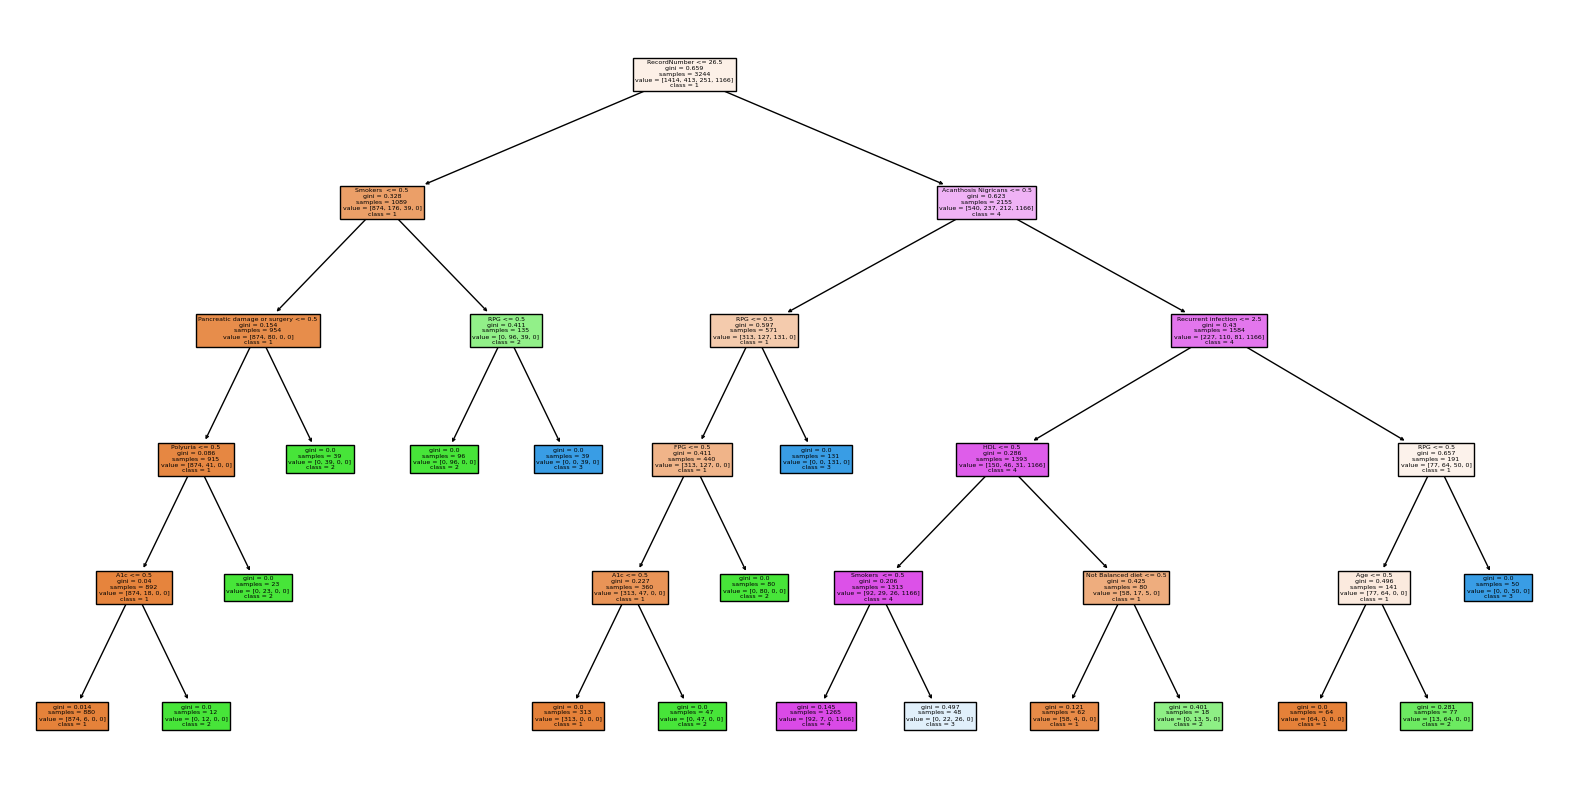

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

dt_clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_clf_gini, feature_names=df.columns[:-1], class_names=list(map(str, set(df['Diagnosis']))), filled=True)
plt.show()


In [ ]:
mapping_dict = {
    0: 'Normal',
    1: 'Prediabetes',
    2: 'T2DM',
    3: 'T2DM with other disease'
}

# Test input data
test_data = [
    [28,1,4,14,1,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1],
    [40,1,10,0,0,0,1,1,1,0,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1],
    [48,1,16,0,0,0,0,0,1,1,1,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0],
    [53,1,37,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0],
    [70,1,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0]
]

# Make predictions and interpret the results
for data in test_data:
    prediction = dt_clf.predict([data])[0]
    print(f"Prediction: {prediction}")
    print(f"Interpretation: {mapping_dict[prediction]}")

In [4]:
# DECISION TREE TREATMENT MODEL
tr_df = pd.read_csv('data/TREATMENT_RECORDv1.csv')
tr_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Level_of_Treatment
0,1,30,0,26,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1.0,PRIMARY CARE
1,2,39,0,36,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0,1.0,1.0,1.0,1.0,PRIMARY CARE
2,20,38,1,40,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE
3,22,37,1,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE
4,23,44,0,34,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,PRIMARY CARE


In [5]:
col_names = tr_df.columns
print(col_names)

Index(['RecordNumber', 'Age', 'Gender', 'BMI', 'Asymptomatic',
       'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss',
       'Blurring of Vision', 'Recurrent infection', 'Obesity',
       'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD',
       'IGT or IFG on previous testing',
       'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ',
       'Women with PCOS',
       'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement',
       'on erythropoietin injections', 'Physical inactivity', 'Smokers ',
       'Not Balanced diet', 'First degree relative with diabetes',
       'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery',
       'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD',
       'Level_of_Treatment'],
      dtype='object')


In [6]:
tr_category_col =['Age', 'Gender', 'BMI', 'Asymptomatic',
       'Increased thirst', 'Polydipsia', 'Polyuria', 'lethargy', 'Weight loss',
       'Blurring of Vision', 'Recurrent infection', 'Obesity',
       'Acanthosis Nigricans', 'A1c', 'FPG', 'RPG', 'OGTT', 'HDL', 'TG', 'CVD',
       'IGT or IFG on previous testing',
       'Women who delivered a baby weighing >= 4kg ', 'Women with GDM ',
       'Women with PCOS',
       'receiving antiretroviral therapy OR atypical antipsychotic OR taking iron supplement',
       'on erythropoietin injections', 'Physical inactivity', 'Smokers ',
       'Not Balanced diet', 'First degree relative with diabetes',
       'Dyslipidaemia', 'Hypertension', 'Pancreatic damage or surgery',
       'genetic, haematologic and illness-related factors', 'Anaemia', 'CKD'] 
labelEncoder = preprocessing.LabelEncoder()

mapping_dict={}
for col in tr_category_col:
    tr_df[col] = labelEncoder.fit_transform(tr_df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

X = tr_df.values[:, 1:37]
Y = tr_df.values[:,37]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
tr_dt_clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)
tr_dt_clf_gini.fit(X_train, y_train)
y_pred_gini = tr_dt_clf_gini.predict(X_test)

print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100 )

{'Age': {18: 0, 19: 1, 20: 2, 21: 3, 22: 4, 23: 5, 24: 6, 25: 7, 26: 8, 27: 9, 28: 10, 29: 11, 30: 12, 31: 13, 32: 14, 33: 15, 34: 16, 35: 17, 36: 18, 37: 19, 38: 20, 39: 21, 40: 22, 41: 23, 42: 24, 43: 25, 44: 26, 45: 27, 46: 28, 47: 29, 48: 30, 49: 31, 50: 32, 51: 33, 52: 34, 53: 35, 54: 36, 55: 37, 56: 38, 57: 39, 58: 40, 59: 41, 60: 42, 61: 43, 62: 44, 63: 45, 64: 46, 65: 47, 66: 48, 67: 49, 68: 50, 69: 51, 70: 52, 76: 53, 82: 54, 83: 55}, 'Gender': {0: 0, 1: 1}, 'BMI': {18: 0, 19: 1, 20: 2, 21: 3, 22: 4, 23: 5, 24: 6, 25: 7, 26: 8, 27: 9, 28: 10, 29: 11, 30: 12, 31: 13, 32: 14, 33: 15, 34: 16, 35: 17, 36: 18, 37: 19, 38: 20, 39: 21, 40: 22, 41: 23, 42: 24, 43: 25, 44: 26, 45: 27}, 'Asymptomatic': {0.0: 0, 1.0: 1}, 'Increased thirst': {0.0: 0, 1.0: 1}, 'Polydipsia': {0.0: 0, 1.0: 1}, 'Polyuria': {0.0: 0, 1.0: 1}, 'lethargy': {0.0: 0, 1.0: 1}, 'Weight loss': {0.0: 0, 1.0: 1}, 'Blurring of Vision': {0.0: 0, 1.0: 1}, 'Recurrent infection': {0.0: 0, 1.0: 1}, 'Obesity': {0.0: 0, 1.0: 1,

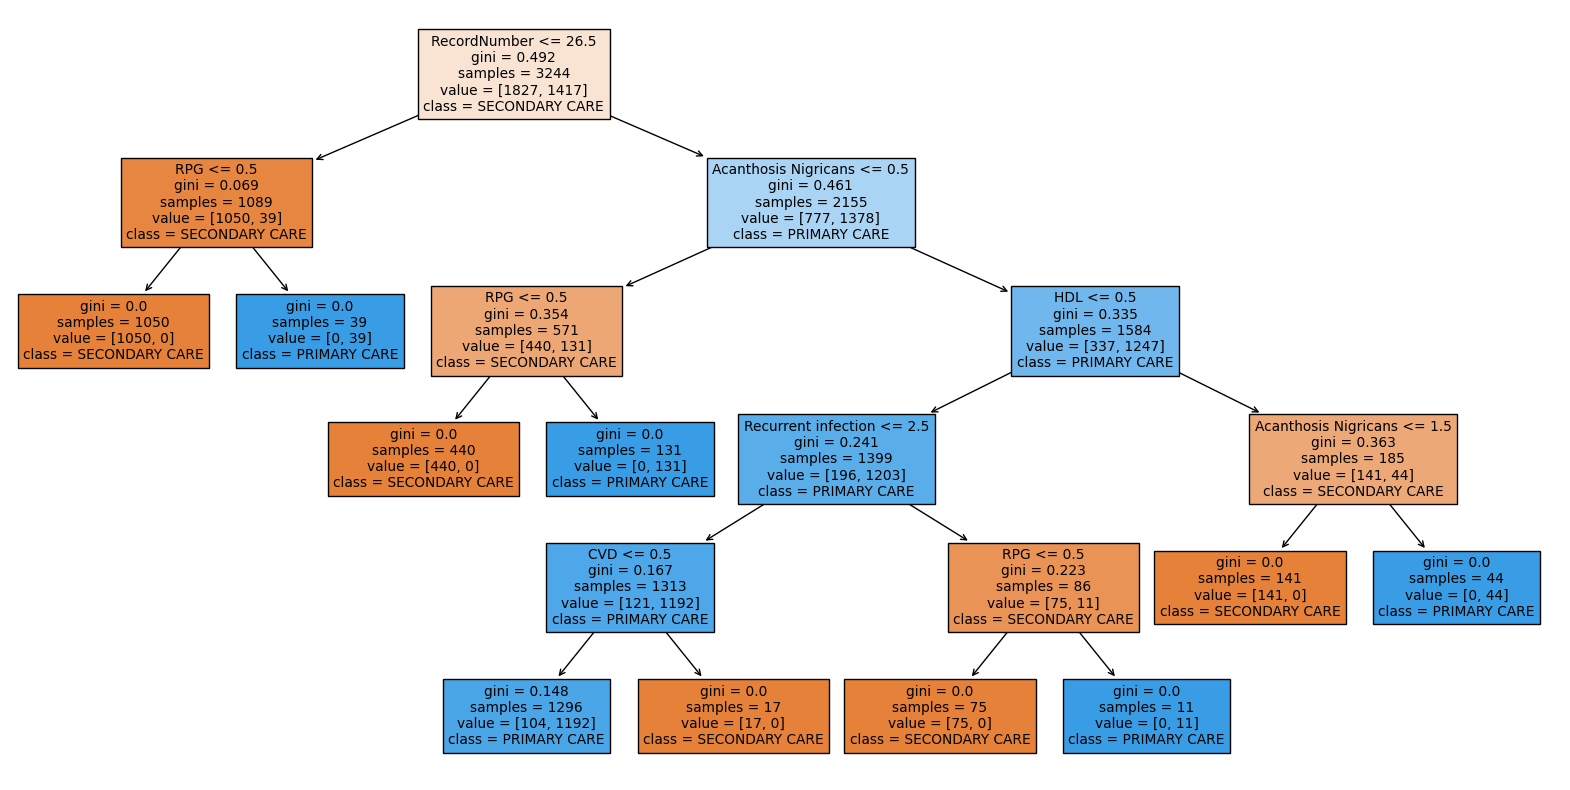

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

tr_dt_clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)
tr_dt_clf_gini.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(tr_dt_clf_gini, feature_names=tr_df.columns[:-1], class_names=list(map(str, set(tr_df['Level_of_Treatment']))), filled=True)
plt.show()


In [8]:
# Count the instances where Diagnosis is equal to 1
total_diagnosis_1 = len(df[df['Diagnosis'] == 1])

# Print the result
print(f'Total instances with Diagnosis 1: {total_diagnosis_1}')

# Count the instances where Diagnosis is equal to 1
total_diagnosis_2 = len(df[df['Diagnosis'] == 2])

# Print the result
print(f'Total instances with Diagnosis 2: {total_diagnosis_2}')

# Count the instances where Diagnosis is equal to 1
total_diagnosis_3 = len(df[df['Diagnosis'] == 3])

# Print the result
print(f'Total instances with Diagnosis 3: {total_diagnosis_3}')

# Count the instances where Diagnosis is equal to 1
total_diagnosis_4 = len(df[df['Diagnosis'] == 4])

# Print the result
print(f'Total instances with Diagnosis 4: {total_diagnosis_4}')



NameError: name 'df' is not defined

In [2]:
df = pd.read_csv('data/DIAGNOSIS_RECORDv2.csv')

In [3]:
# Filter instances where Diagnosis is equal to 1
diagnosis_1_data = df[df['Diagnosis'] == 2]

# Split the data into training and testing sets
train_data, test_data = train_test_split(diagnosis_1_data, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f'Training data size: {len(train_data)}')
print(f'Testing data size: {len(test_data)}')

# Save the testing data to a new CSV file
test_data.to_csv('data_diagnosis_2.csv', index=False)

Training data size: 422
Testing data size: 106


In [4]:
# Filter instances where Diagnosis is equal to 1
diagnosis_3_data = df[df['Diagnosis'] == 3]

# Split the data into training and testing sets
train_data, test_data = train_test_split(diagnosis_3_data, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f'Training data size: {len(train_data)}')
print(f'Testing data size: {len(test_data)}')

# Save the testing data to a new CSV file
test_data.to_csv('data_diagnosis_3.csv', index=False)

Training data size: 249
Testing data size: 63


In [5]:
# Filter instances where Diagnosis is equal to 1
diagnosis_4_data = df[df['Diagnosis'] == 4]

# Split the data into training and testing sets
train_data, test_data = train_test_split(diagnosis_4_data, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f'Training data size: {len(train_data)}')
print(f'Testing data size: {len(test_data)}')

# Save the testing data to a new CSV file
test_data.to_csv('data_diagnosis_4.csv', index=False)

Training data size: 1152
Testing data size: 288


In [ ]:
# Check data types for each column
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Data type: {df[col].dtype}")

In [8]:
print(tr_df)

      RecordNumber  Age  Gender  BMI  Asymptomatic  Increased thirst  \
0                1   12       0    8             1                 0   
1                2   21       0   18             1                 0   
2               20   20       1   22             0                 1   
3               22   19       1    4             0                 0   
4               23   26       0   16             0                 0   
...            ...  ...     ...  ...           ...               ...   
4051          4996   46       0   16             0                 0   
4052          4997   35       0    3             0                 0   
4053          4998   31       0   10             0                 0   
4054          4999   44       1    6             1                 0   
4055          5000   47       1   15             1                 0   

      Polydipsia  Polyuria  lethargy  Weight loss  ...  Smokers   \
0              0         0         0            0  ...         1   

In [9]:

print(tr_df)

# Mapping for level_of_treatment
level_mapping = {'PRIMARY CARE': 1, 'SECONDARY CARE': 2}

# Convert 'level_of_treatment' to integers based on the mapping
tr_df['Level_of_Treatment'] = tr_df['Level_of_Treatment'].map(level_mapping)

# Display the modified dataset
print("\nDataset with 'level_of_treatment' converted to integers:")
print(tr_df)

tr_df.to_csv('TREATMENT_RECORDv2.csv', index=False)

      RecordNumber  Age  Gender  BMI  Asymptomatic  Increased thirst  \
0                1   12       0    8             1                 0   
1                2   21       0   18             1                 0   
2               20   20       1   22             0                 1   
3               22   19       1    4             0                 0   
4               23   26       0   16             0                 0   
...            ...  ...     ...  ...           ...               ...   
4051          4996   46       0   16             0                 0   
4052          4997   35       0    3             0                 0   
4053          4998   31       0   10             0                 0   
4054          4999   44       1    6             1                 0   
4055          5000   47       1   15             1                 0   

      Polydipsia  Polyuria  lethargy  Weight loss  ...  Smokers   \
0              0         0         0            0  ...         1   

In [11]:
tr_df.head()

,RecordNumber,Age,Gender,BMI,Asymptomatic,Increased thirst,Polydipsia,Polyuria,lethargy,Weight loss,...,Smokers,Not Balanced diet,First degree relative with diabetes,Dyslipidaemia,Hypertension,Pancreatic damage or surgery,"genetic, haematologic and illness-related factors",Anaemia,CKD,Level_of_Treatment
0,1,12,0,8,1,0,0,0,0,0,...,1,1,1,1,0,0,1,0,1,1
1,2,21,0,18,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,1
2,20,20,1,22,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,22,19,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23,26,0,16,0,0,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
